In [1]:
import os
import zipfile
from google.colab import drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import os
import zipfile
from google.colab import drive

# Path to the zip file in your Google Drive
zip_file_path = '/content/drive/MyDrive/Colab Notebooks/archive.zip'

# Specify the path where you want to extract the train and validation files
extracted_data_path = '/content/drive/MyDrive/Colab Notebooks/face_recog_image1'

# Create the extraction directory if it doesn't exist
os.makedirs(extracted_data_path, exist_ok=True)

# Extract the train and validation files
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    for file in zip_ref.namelist():
        if 'train' in file or 'validation' in file:
            zip_ref.extract(file, path=extracted_data_path)

# List the extracted files
extracted_files = os.listdir(extracted_data_path)
print("Extracted files:")
for file in extracted_files:
    print(file)

Extracted files:
images


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Dropout,MaxPooling2D,Flatten,BatchNormalization
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [6]:
Train_dir="D:\\data science\\DS project\\Facial Regognition\\archive\\images\\train"
Test_dir= "D:\\data science\\DS project\\Facial Regognition\\archive\\images\\validation"

In [7]:
import os

def load_dataset(directory):
    image_paths = []
    labels = []

    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            for filename in os.listdir(label_dir):
                image_path = os.path.join(label_dir, filename)
                image_paths.append(image_path)
                labels.append(label)
            print(label, "Completed")

    return image_paths, labels

#Train_dir = '/content/drive/MyDrive/Colab Notebooks/face_recog_image2/images/train'
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(Train_dir)

train = train.sample(frac=1).reset_index(drop=True)
train.head()

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


,image,label
0,D:\data science\DS project\Facial Regognition\...,neutral
1,D:\data science\DS project\Facial Regognition\...,disgust
2,D:\data science\DS project\Facial Regognition\...,neutral
3,D:\data science\DS project\Facial Regognition\...,neutral
4,D:\data science\DS project\Facial Regognition\...,surprise


In [8]:
#Test_dir='/content/drive/MyDrive/Colab Notebooks/face_recog_image2/images/validation'
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(Test_dir)

test = test.sample(frac=1).reset_index(drop=True)
test.head()

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


,image,label
0,D:\data science\DS project\Facial Regognition\...,happy
1,D:\data science\DS project\Facial Regognition\...,happy
2,D:\data science\DS project\Facial Regognition\...,happy
3,D:\data science\DS project\Facial Regognition\...,angry
4,D:\data science\DS project\Facial Regognition\...,neutral


In [9]:
train.shape

(28821, 2)

In [10]:
test.shape

(7066, 2)

# EDA

In [12]:
train.label.value_counts()

happy       7164
neutral     4982
sad         4938
fear        4103
angry       3993
surprise    3205
disgust      436
Name: label, dtype: int64

In [13]:
test.label.value_counts()

happy       1825
neutral     1216
sad         1139
fear        1018
angry        960
surprise     797
disgust      111
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

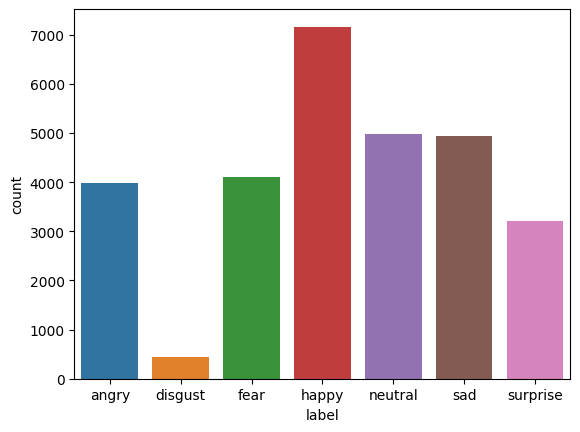

In [14]:
import seaborn as sns

# Convert the 'label' column to categorical data type
train['label'] = train['label'].astype('category')

# Plot the countplot
sns.countplot(data=train, x='label')

<Axes: xlabel='label', ylabel='count'>

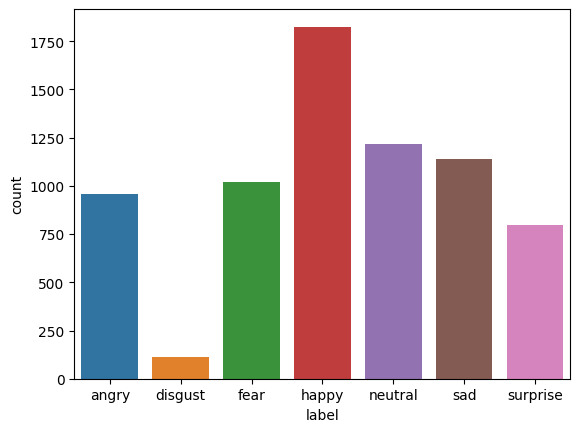

In [15]:
import seaborn as sns

# Convert the 'label' column to categorical data type
test['label'] = test['label'].astype('category')

# Plot the countplot
sns.countplot(data=test, x='label')

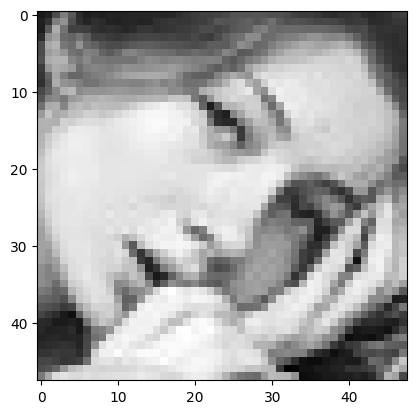

In [16]:
from PIL import Image
img=Image.open(train['image'][0])
plt.imshow(img,cmap='gray')

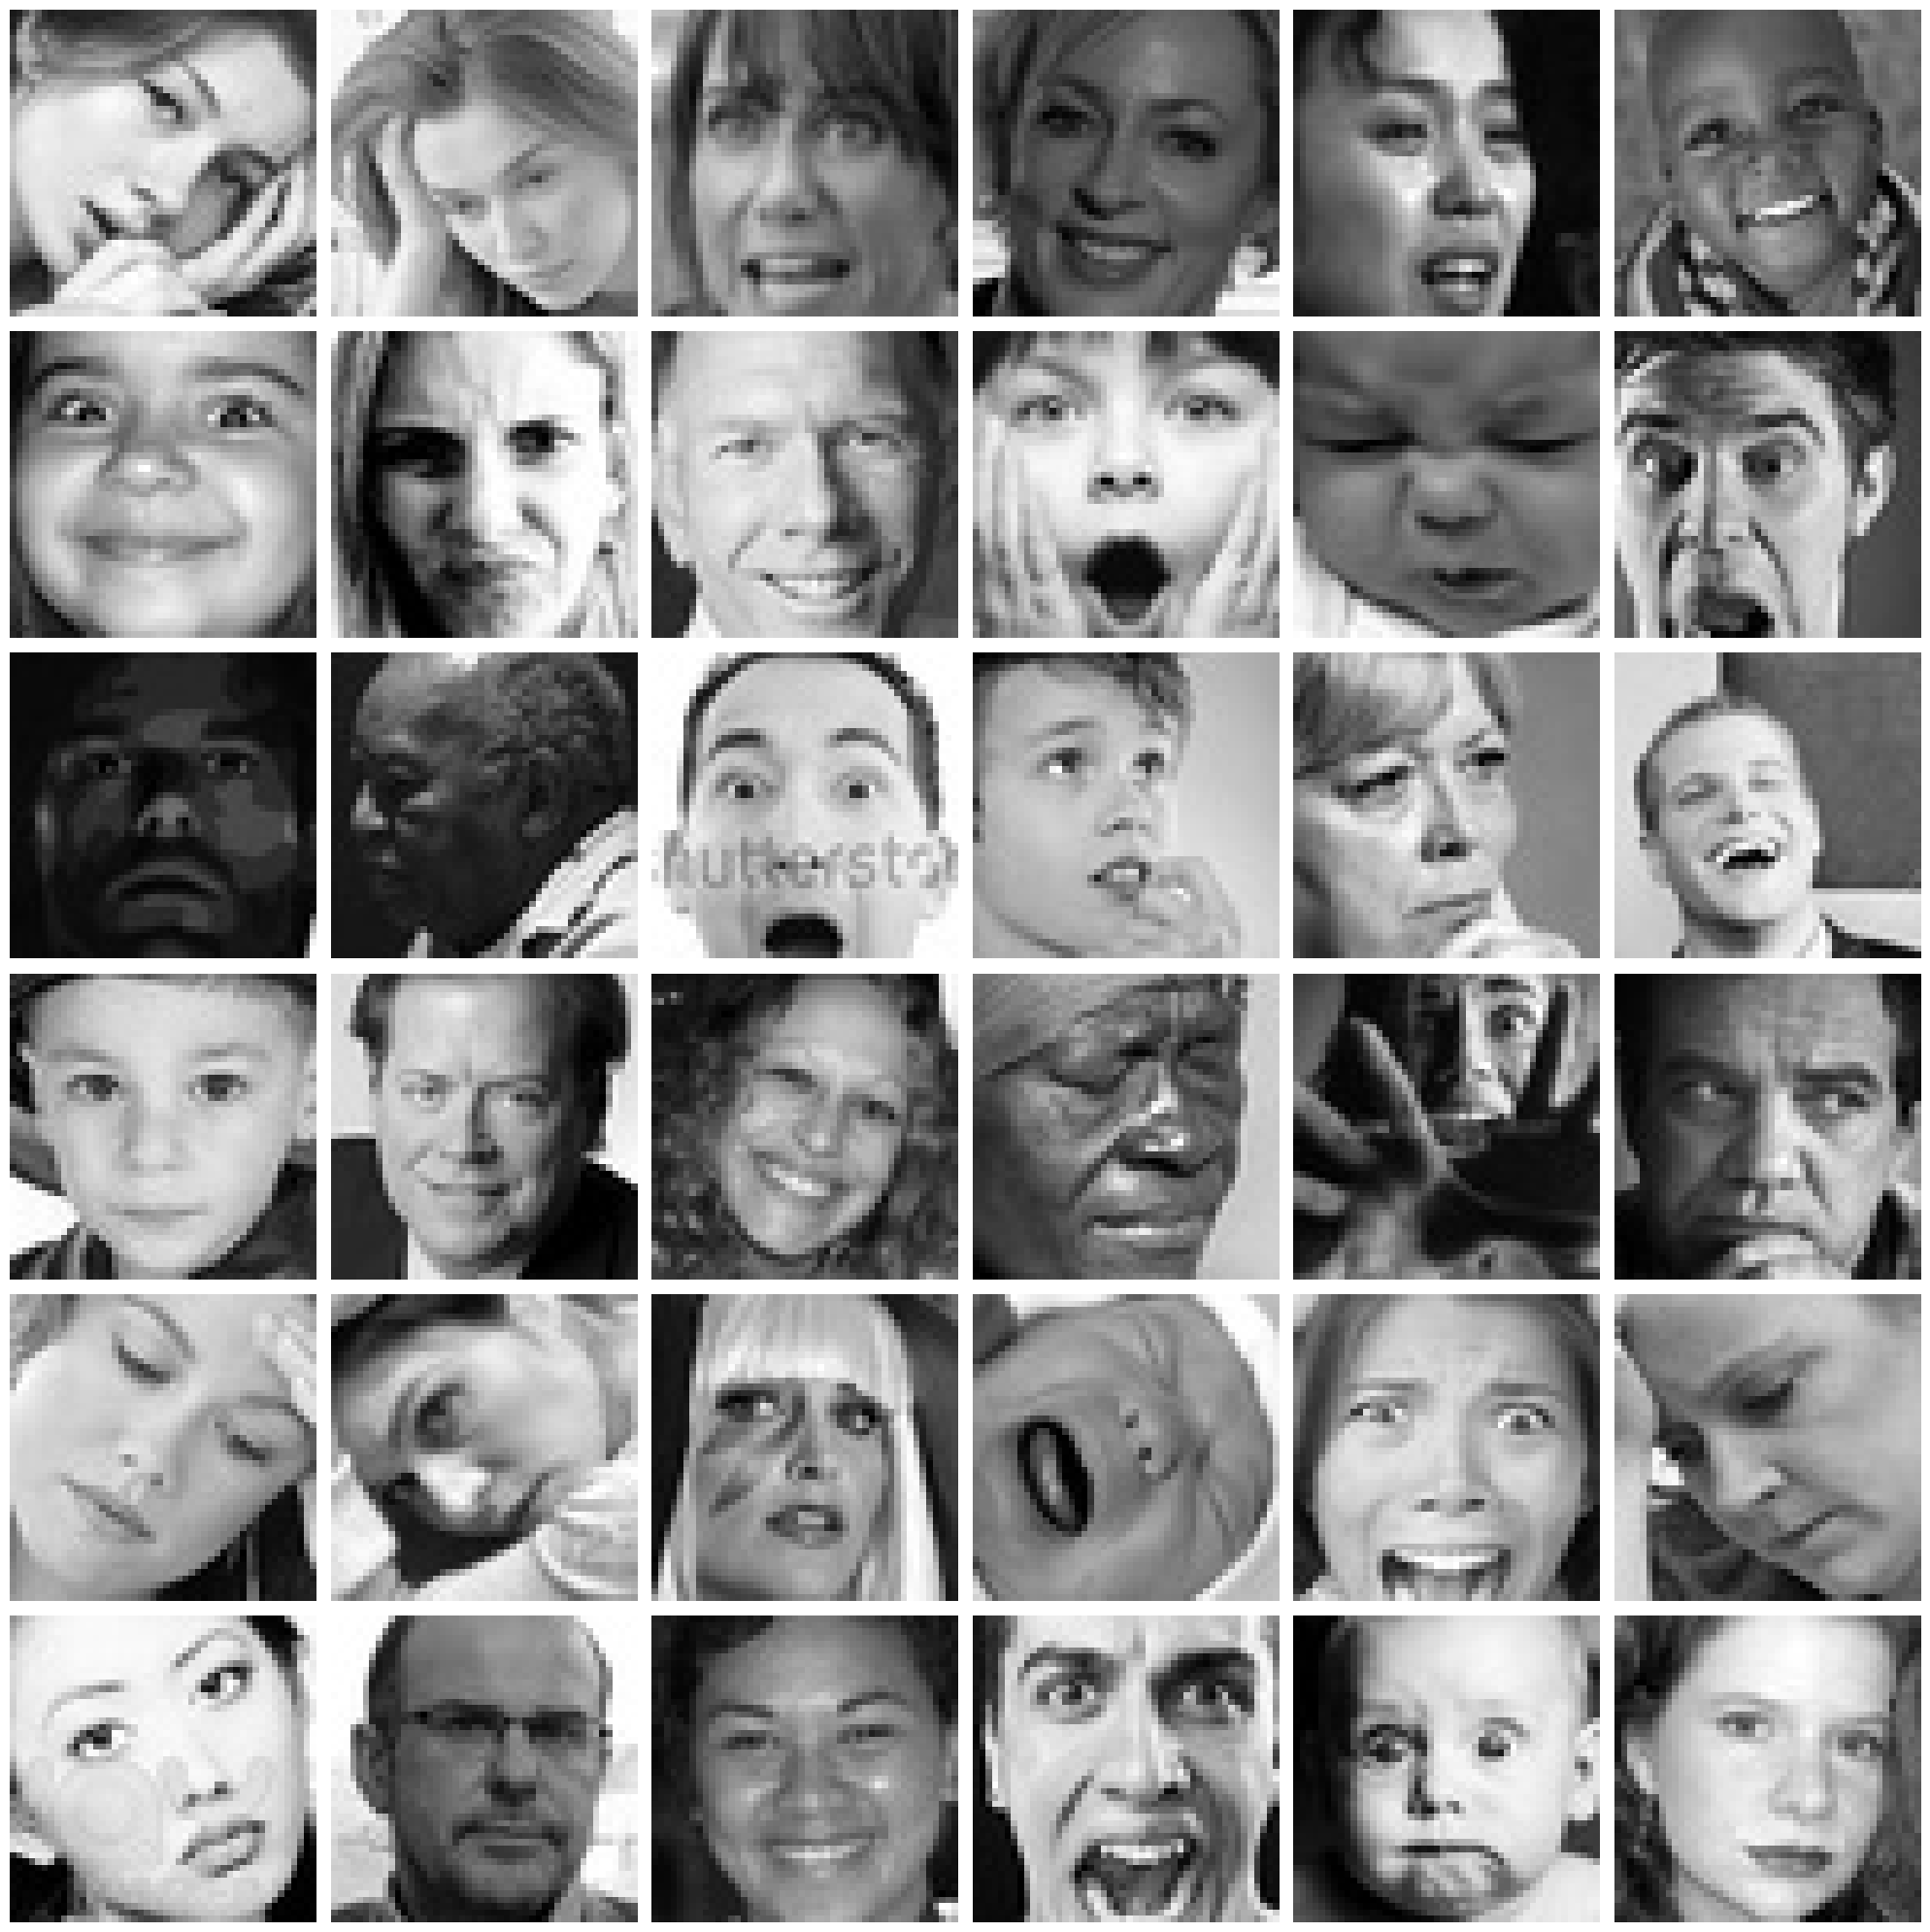

In [17]:
fig, ax = plt.subplots(6, 6, figsize=(20,20))
k = 0

for i in range(6):
    for j in range(6):
        img_path = train['image'][k]
        img = Image.open(img_path)
        ax[i][j].imshow(img, cmap='gray')
        ax[i][j].axis('off')
        k += 1

plt.tight_layout()
plt.show()


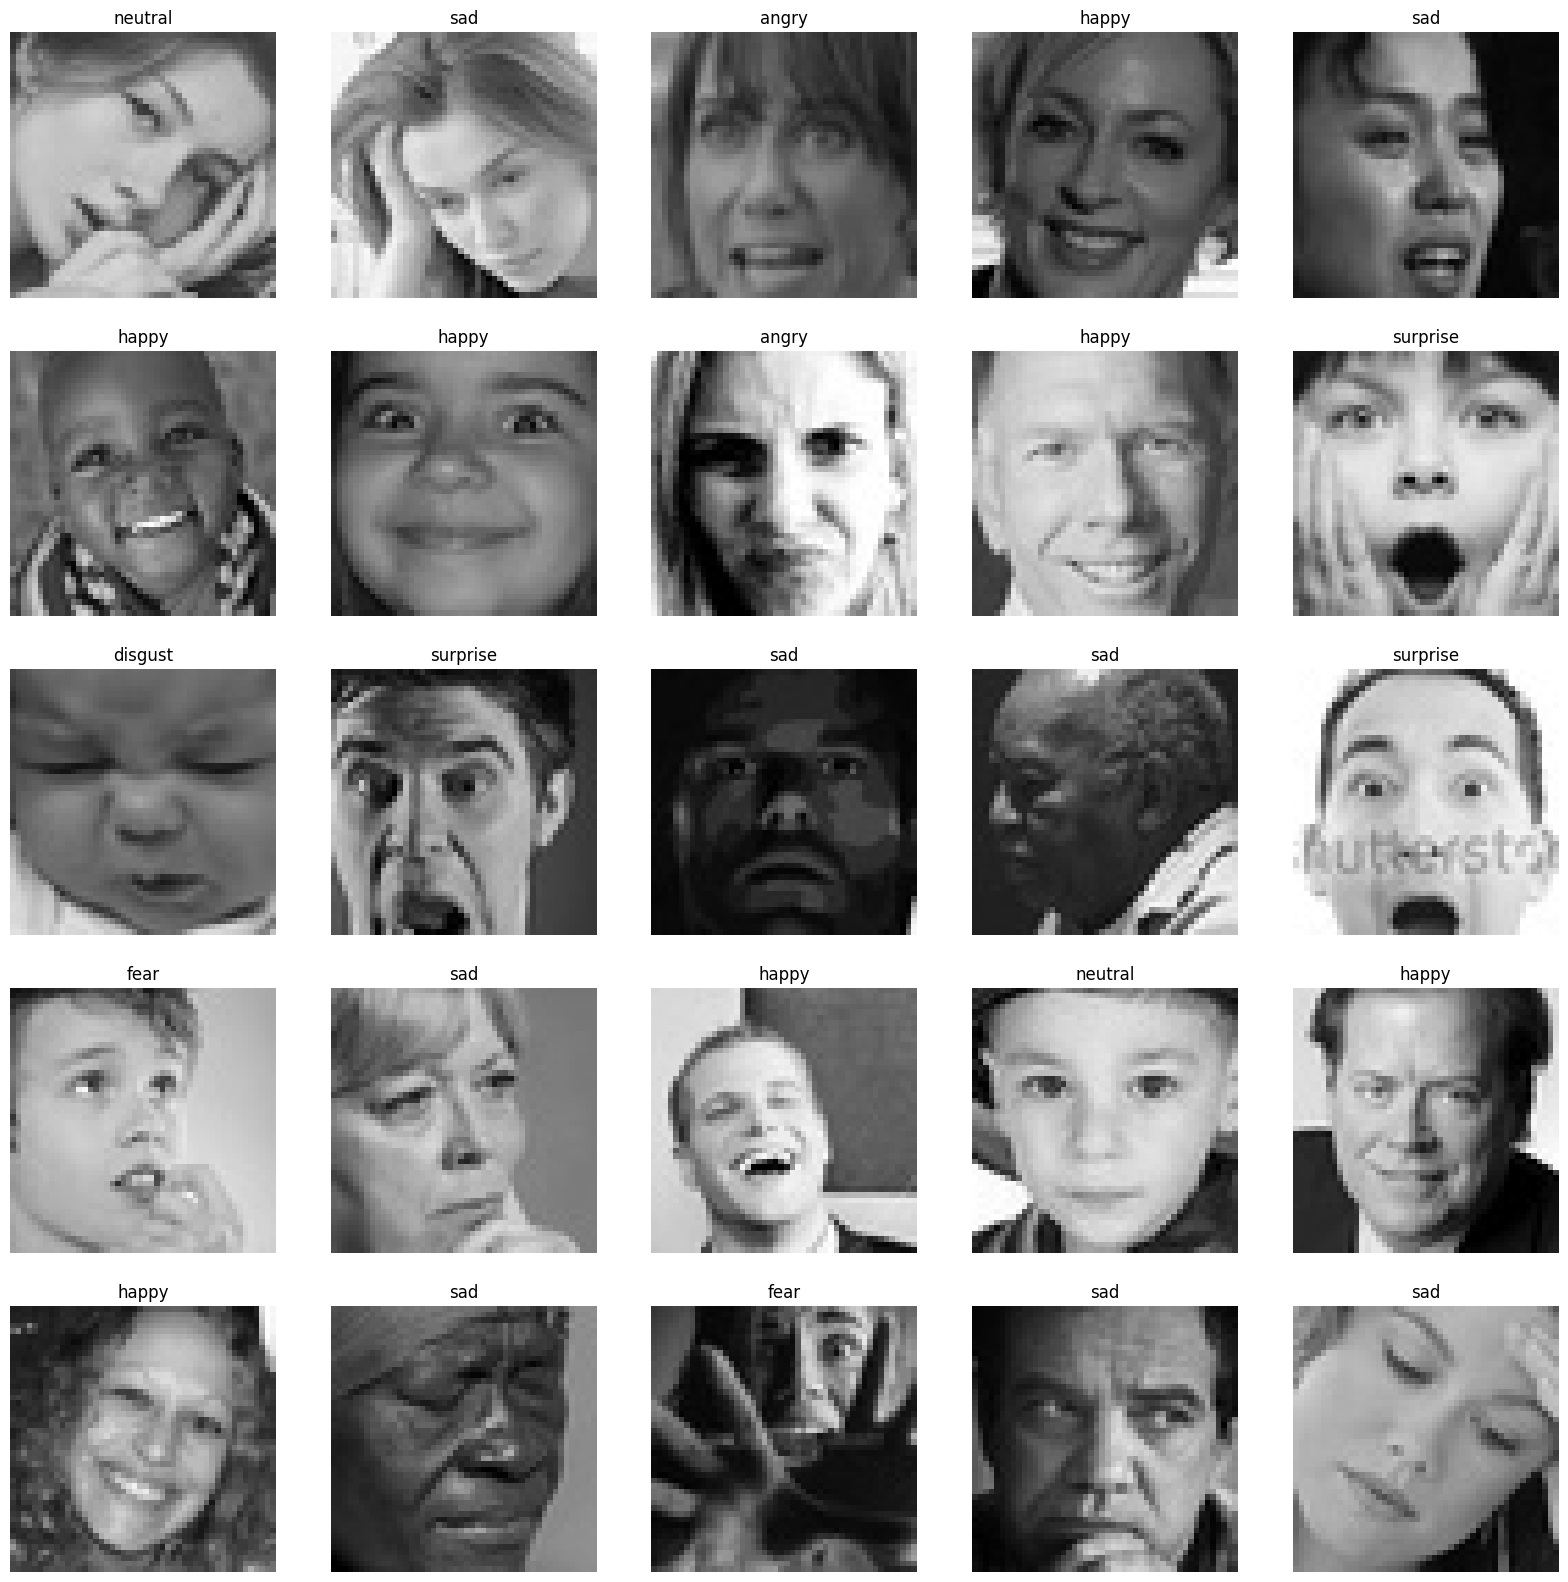

In [18]:
# to display grid of images
plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

In [11]:
def extract_features(images):
  features=[]
  for image in tqdm(images):
    img=load_img(image,grayscale='True')
    img=np.array(img)
    features.append(img)
  features=np.array(features)
  features=features.reshape(len(features),48,48,1)
  return features

In [12]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [13]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

# Normalization

In [14]:
# Normalize the features
x_train=train_features/255
x_test=test_features/255

In [24]:
x_train.shape[0]

28821

In [25]:
x_train_flattened = x_train.reshape(x_train.shape[0], -1)
x_test_flattened = x_test.reshape(x_test.shape[0], -1)

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(train['label'])
y_test=le.transform(test['label'])

# CNN-Model 1

In [ ]:
y_train=to_categorical(y_train,num_classes=7)
y_test=to_categorical(y_test,num_classes=7)

In [ ]:
# config
input_shape = (48, 48, 1)
output_class = 7

In [ ]:
model=Sequential()

# Layer1
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape,padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))

# Layer2
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))

# Layer3
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))

# Layer4
model.add(Conv2D(252,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))

# Layer5
model.add(Conv2D(512,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

# Neural Network

model.add(Dense(128,activation='tanh'))
model.add(Dropout(0.4))
model.add(Dense(64,activation='tanh'))
model.add(Dropout(0.4))
model.add(Dense(32,activation='tanh'))
model.add(Dropout(0.4))

# output Layer

model.add(Dense(output_class,activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
history = model.fit(x=x_train, y=y_train, batch_size=128,epochs=100, validation_data=(x_test, y_test))

- Training accuracy is 79.72
- Validation accuracy is 62.14

# Model 2

In [1]:
model=Sequential()

# Layer1
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape,padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))

# Layer2
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))

# Layer3
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))

# Layer4
model.add(Conv2D(252,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))

# Layer5
model.add(Conv2D(512,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

# Neural Network

model.add(Dense(128,activation='tanh'))
model.add(Dropout(0.4))
model.add(Dense(64,activation='tanh'))
model.add(Dropout(0.4))
model.add(Dense(32,activation='tanh'))
model.add(Dropout(0.4))

# output Layer

model.add(Dense(output_class,activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics='accuracy')

In [2]:
history = model.fit(x=x_train, y=y_train, batch_size=128,epochs=100, validation_data=(x_test, y_test))

- Training accuracy is 62.66
- Validation accuracy is 62.13
- Lets try with data augmentation and further build the cnn model 

# Augmentation and Preprocessing

In [1]:
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG,Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

In [14]:
datagen_train=ImageDataGenerator(rescale=1./255, zoom_range=0.3,horizontal_flip=True)

train_generator=datagen_train.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/face_recog_image1/images/train',
                                                  batch_size=64,
                                                  target_size=(48,48),
                                                  shuffle=True,
                                                  color_mode='grayscale',
                                                 class_mode='categorical')

datagen_test=ImageDataGenerator(rescale=1./255, zoom_range=0.3,horizontal_flip=True)

test_generator=datagen_test.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/face_recog_image1/images/validation',
                                                  batch_size=64,
                                                  target_size=(48,48),
                                                  shuffle=True,
                                                  color_mode='grayscale',
                                                 class_mode='categorical')

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Model 2

In [31]:
from keras.optimizers import Adam
from keras import regularizers

model=tf.keras.models.Sequential()

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu',input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(5,5),padding='same',activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(512,kernel_size=(3,3),padding='same',activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(512,kernel_size=(3,3),padding='same',activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7,activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0005),
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_12 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 128)       204928    
                                                                 
 batch_normalization_13 (Bat  (None, 24, 24, 128)     

In [26]:
from livelossplot.inputs.tf_keras import PlotLossesCallback
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG,Image

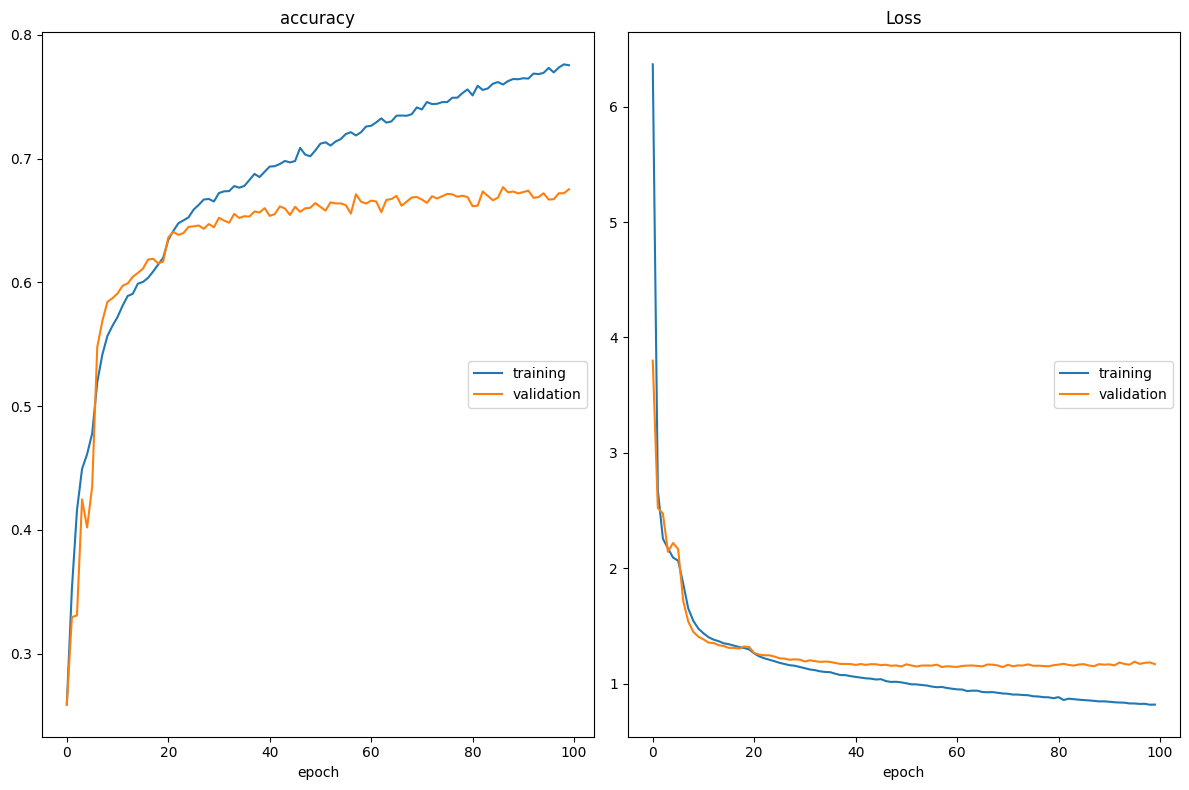

accuracy
	training         	 (min:    0.259, max:    0.776, cur:    0.775)
	validation       	 (min:    0.259, max:    0.677, cur:    0.675)
Loss
	training         	 (min:    0.819, max:    6.366, cur:    0.820)
	validation       	 (min:    1.145, max:    3.799, cur:    1.171)

Epoch 100: saving model to model_weights.h5
450/450 [==============================] - 75s 165ms/step - loss: 0.8202 - accuracy: 0.7754 - val_loss: 1.1706 - val_accuracy: 0.6752 - lr: 1.0000e-05


In [32]:
epochs=100
steps_per_epoch=train_generator.n/train_generator.batch_size
testing_steps=test_generator.n/test_generator.batch_size

checkpoint=ModelCheckpoint("model_weights.h5",monitor="val_accuracy",save_weights_only=True,mode='max',verbose=1)
reduce_lr=ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')

callbacks=[PlotLossesCallback(),checkpoint,reduce_lr]

history=model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=testing_steps,
    callbacks=callbacks
)

- Training accuracy - 77.54%
- validation accuracy - 67.52%
- accuracy is well improved after data augmentation but there is slight overfitting to overcome these we can use the early stopping

# Evaluation

**Training and validation loss curves**

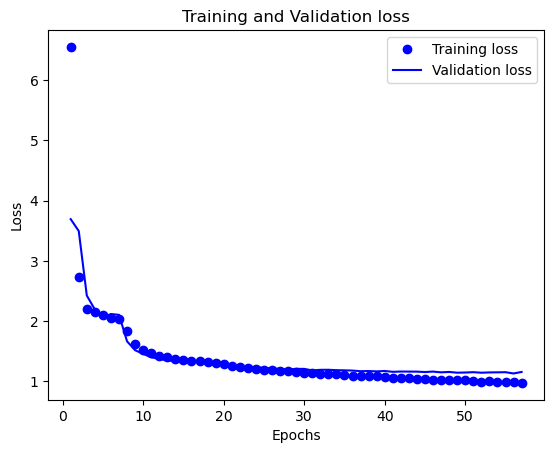

In [10]:
#plot the train and validation loss
train_loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(train_loss)+1)
plt.plot(epochs,train_loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Training and Validation accuracy curves**

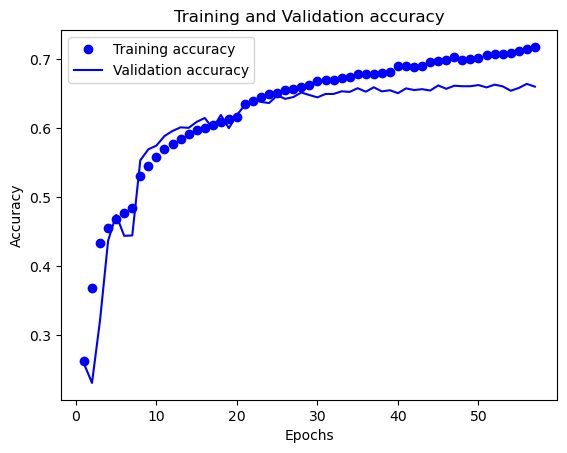

In [11]:
#plot the train and validation accuracy
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.plot(epochs,train_acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Confusion Matrix

111/111 [==============================] - 14s 123ms/step


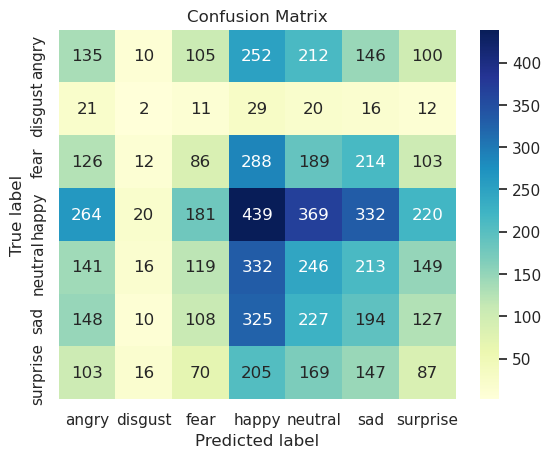

In [12]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Get the true labels and predicted labels for the validation set
validation_labels=test_generator.classes
validation_pred_probs=model.predict(test_generator)
validation_pred_labels=np.argmax(validation_pred_probs,axis=1)

#compute the confusion matrix
cm=confusion_matrix(validation_labels,validation_pred_labels)
class_names=list(train_generator.class_indices.keys())
sns.set()
sns.heatmap(cm,annot=True,fmt='d',cmap='YlGnBu',
            xticklabels=class_names,yticklabels=class_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [13]:
label_dict={0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [14]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
def prediction(url):
    img=plt.imread(url)
    plt.imshow(img)
    data=img_to_array(img)
    data=data/255
    data=tf.image.resize(data,(48,48))
    samples=np.expand_dims(data,0)
    samples=np.resize(samples,(1,48,48,1))
    result=model.predict(samples)
    result=list(result[0])
    print(result)
    predictions=label_dict[np.argmax(result)]
    return predictions

1/1 [==============================] - 0s 338ms/step
[0.018232644, 2.5423664e-05, 0.003665219, 6.947742e-05, 0.9732624, 0.0040896176, 0.00065512455]


'Neutral'

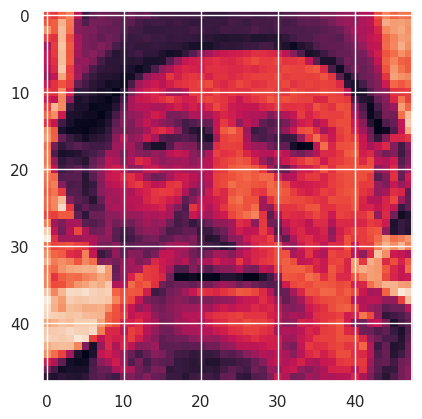

In [15]:
prediction("D:\data science\DS project\Facial Regognition\archive\images\validation\angry\23.jpg")

1/1 [==============================] - 0s 22ms/step
[0.05954848, 0.0008665496, 0.3444885, 0.0026453007, 0.31328824, 0.2096423, 0.06952067]


'Fear'

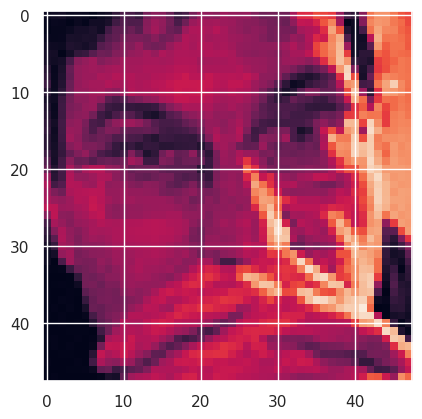

In [16]:
prediction('"D:\data science\DS project\Facial Regognition\archive\images\validation\angry\38.jpg"')